# Proyek Analisis Data: Nama dataset
- Nama: Achmad Supriyanto
- Email: achmad.supriyanto@gmail.com
- Id Dicoding: achmad_supriyanto

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Menyiapkan semua library yang dibutuhkan

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [218]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [219]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [220]:
orderitems_df = pd.read_csv("data/order_items_dataset.csv")
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [221]:
orderpayments_df = pd.read_csv("data/order_payments_dataset.csv")
orderpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [222]:
orderreviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [223]:
orderdataset_df = pd.read_csv("data/orders_dataset.csv")
orderdataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [224]:
productcattrans_df = pd.read_csv("data/product_category_name_translation.csv")
productcattrans_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [225]:
productdataset_df = pd.read_csv("data/products_dataset.csv")
productdataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [226]:
sellerdataset_df = pd.read_csv("data/sellers_dataset.csv")
sellerdataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

### Menilai Data customers_df

In [227]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [228]:
customers_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [229]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Menilai Data geolocation_df

In [230]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [231]:
geolocation_df.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [232]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Menilai Data orderitems_df

In [233]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [234]:
orderitems_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [235]:
print("Jumlah duplikasi: ",orderitems_df.duplicated().sum())
orderitems_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai Data orderpayments_df

In [236]:
orderpayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [237]:
orderpayments_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [238]:
print("Jumlah duplikasi: ",orderpayments_df.duplicated().sum())
orderpayments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai Data orderreviews_df

In [239]:
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [240]:
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [241]:
print("Jumlah duplikasi: ", orderreviews_df.duplicated().sum())
orderreviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menilai Data orders_df

In [242]:
orderdataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [243]:
orderdataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [244]:
print("Jumlah duplikasi: ",orderdataset_df.duplicated().sum())
orderdataset_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai Data productcattrans_df

In [245]:
productcattrans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [246]:
productcattrans_df.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

In [247]:
print("Jumlah duplikasi: ", productcattrans_df.duplicated().sum())
productcattrans_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Menilai Data productdataset_df

In [248]:
productdataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [249]:
productdataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [250]:
print("Jumlah duplikasi: ", productdataset_df.duplicated().sum())
productdataset_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai Data sellerdataset_df

In [251]:
sellerdataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [252]:
sellerdataset_df.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [253]:
print("Jumlah duplikasi: ", sellerdataset_df.duplicated().sum())
sellerdataset_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


productdataset_dfDari hasil analisis indentifikasi nilai pada 9 tabel didapat beberapa temuan pada 4 tabel sebagai berikut:

1. Tabel geolocation_df terdapat Duplicate data berjumlah: 261831.

2. Tabel orderreviews_df terdapat Missing value pada kolom: 
      - review_comment_title: 87656
      - review_comment_message: 58247

3. Tabel orderdataset_df terdapat Kesalahan tipe data pada kolom :
      - order_purchase_timestamp
      - order_approved_at
      - order_delivered_carrier_date
      - order_delivered_customer_date
      - order_estimated_delivery_date
      
   Tabel orderdataset_df terdapat Missing value pada kolom:
      - order_approved_at: 160
      - order_delivered_carrier_date: 1783
      - order_delivered_customer_date: 2965

4. Tabel productdataset_df terdapat Missing value pada kolom:
      - product_category_name : 610
      - product_name_lenght : 610
      - product_description_lenght : 610
      - product_photos_qty : 610
      - product_weight_g : 2
      - product_length_cm : 2
      - product_height_cm : 2
      - product_width_cm : 2



### Cleaning Data

### Membersihkan Data geolocation_df

### Menghilangkan Duplicate Data

In [254]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [255]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


### Membersihkan Data orderreviews_df

### Menangani Missing Values

In [256]:
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [257]:
orderreviews_df[orderreviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [258]:
orderreviews_df['review_comment_title'].fillna('', inplace=True)

In [259]:
orderreviews_df[orderreviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [260]:
orderreviews_df['review_comment_message'].fillna('', inplace=True)

In [261]:
orderreviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Membersihkan Data orderdataset_df

### Memperbaiki Tipe Data

In [262]:
orderdataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [263]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:orderdataset_df[column] = pd.to_datetime(orderdataset_df[column])

In [264]:
orderdataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [265]:
orderdataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### Menangani Missing Values

In [266]:
orderdataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [267]:
# Mengganti missing values pada kolom "order_approved_at" dengan nilai dari "order_estimated_delivery_date"
orderdataset_df['order_approved_at'].fillna(orderdataset_df['order_estimated_delivery_date'], inplace=True)

# Mengganti missing values pada kolom "order_delivered_carrier_date" dengan nilai dari "order_estimated_delivery_date"
orderdataset_df['order_delivered_carrier_date'].fillna(orderdataset_df['order_estimated_delivery_date'], inplace=True)

# Mengganti missing values pada kolom "order_delivered_customer_date" dengan nilai dari "order_estimated_delivery_date"
orderdataset_df['order_delivered_customer_date'].fillna(orderdataset_df['order_estimated_delivery_date'], inplace=True)

In [268]:
orderdataset_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Membersihkan Data productdataset_df

### Menangani Missing Values

In [269]:
productdataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [270]:
productdataset_df[productdataset_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [271]:
productdataset_df.dropna(inplace=True)

In [272]:
productdataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [273]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
52577,c79c8d356d92bb1b74efb6c4a7766527,bc19782d13a3729e8ebcd477e849034f,4571,sao paulo,SP
2603,7dec45cedb15e19cfb82319ec276ac19,36a52887c02f7e1f223513f1fdea8ac3,20551,rio de janeiro,RJ
48789,d8cf9aaa20e7204f0606dbeeca4f88ad,f665885a918a283d25910db7e8cf94e3,6315,carapicuiba,SP
54063,87f89eaa5b5eb1fb894ebf0c3ba5fa44,283df413f80a8d4b7bded119188745d1,15290,buritama,SP
80677,397562f2f757aff9899caac6d66a05f5,22149fef0f3bf67cfb02c878f3cfc2a0,37410,tres coracoes,MG


In [274]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [275]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [276]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore geolocation_df

In [277]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
6092,1233,-23.542202,-46.664049,sao paulo,SP
68860,3966,-23.598272,-46.477779,sao paulo,SP
972653,95750,-29.446828,-51.508604,salvador do sul,RS
540404,29800,-18.758274,-40.885877,barra de são francisco,ES
958488,93700,-29.688406,-51.063853,campo bom,RS


In [278]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


### Explore Data orderitems_df

In [279]:
orderitems_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
39816,5a91aca4cab56a1119249a6ab5d41318,1,3fb22448e11f38ac4437c25693fcac1e,b8555308bfdb4ca1ed54325a58da9a97,2018-06-19 02:30:24,144.9,27.67
38865,585408183a59b92dd0308fc1fdacac49,1,186fe07c8b8005ec6a498587ffbc1352,6560211a19b47992c3666cc44a7e94c0,2018-03-22 19:10:25,29.0,18.23
70125,a001b704f3b4f4d26206555271f83e45,1,49c8221f68acec04f84cc22c58be6c5a,f8db351d8c4c4c22c6835c19a46f01b0,2017-07-27 08:05:21,59.9,9.94
49789,7123f52d364ee0592e24743d2714f05d,1,b94d8ea73a0921d4019e67239784e7f6,82e0a475a88cc9595229d8029273f045,2017-11-03 14:05:55,284.9,16.75
63679,9166f60cadc480c3e5de21ca8daf2fdc,1,3c883b9d3fd2d0ce448d4136349dc0a4,b39d7fe263ef469605dbb32608aee0af,2018-07-11 00:15:12,55.0,14.70


In [280]:
orderitems_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [281]:
orderitems_df.groupby(by="product_id").agg({
    "order_id": "nunique",
    "price": ["max", "min", "mean", "std"]
})

order_id   price                          
                                  nunique     max     min    mean       std
product_id                                                                 
00066f42aeeb9f3007548bb9d3f33c38        1  101.65  101.65  101.65       NaN
00088930e925c41fd95ebfe695fd2655        1  129.90  129.90  129.90       NaN
0009406fd7479715e4bef61dd91f2462        1  229.00  229.00  229.00       NaN
000b8f95fcb9e0096488278317764d19        2   58.90   58.90   58.90  0.000000
000d9be29b5207b54e86aa1b1ac54872        1  199.00  199.00  199.00       NaN
...                                   ...     ...     ...     ...       ...
fff6177642830a9a94a0f2cba5e476d1        2  119.99  109.99  114.99  7.071068
fff81cc3158d2725c0655ab9ba0f712c        1   90.00   90.00   90.00       NaN
fff9553ac224cec9d15d49f5a263411f        1   32.00   32.00   32.00       NaN
fffdb2d0ec8d6a61f0a0a0db3f25b441        5   34.99   29.99   33.99  2.236068
fffe9eeff12fcbd74a2f2b007dde0c58        1  249.99  249.99  249.99       NaN

[32951 rows x 5 columns]

### Explore Data orderpayments_df

In [282]:
orderpayments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
55829,126da462f642d99483c0691ac474c783,1,credit_card,1,64.51
69554,b42c3979ca033193016394e37f74d668,1,credit_card,6,138.96
41689,c9653cca1e27f0816402332712a4c87f,1,boleto,1,65.76
62110,de8b633e3fbc018e05354a54fbc8fff0,1,credit_card,5,119.84
36976,8bf8a39f0859c5d00da3d27e8ef39d7f,1,boleto,1,40.13


In [283]:
orderpayments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### Explore Data orderreviews_df

In [284]:
orderreviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
82791,e1245ee2f8e4a7aa2335bbabfda985a0,33adf242c9c30fa2e16fc97d70845487,1,Incompetência,Solicitei o cancelamento da compra após compra...,2018-06-27 00:00:00,2018-06-30 02:24:03
18163,e1e8a59588536862ad8ea15e389ef22c,7c6b6a9c3d77dcb56f9d216b3edbb1a9,4,,"Produto chegou dentro do prazo e muito bonito,...",2017-02-25 00:00:00,2017-03-01 12:57:48
17721,5d74b4dede7e85cad6ab1d5e494fc78d,dd4fd02da4171046f038fc4dc782ef24,5,,,2018-02-10 00:00:00,2018-02-16 21:03:38
38790,ddbdbd07536c26529e7bad6ed08ea29a,3f81d05c2ac8f59242c55b5b4460f795,1,,"Adorei, chegou super rápido. Perfeito",2018-05-17 00:00:00,2018-05-24 10:59:19
63687,0e175a4acceba13907daab9b1dcef72a,2cad5aa95a3bc7f622d44d01452b7887,5,,,2017-12-05 00:00:00,2017-12-06 10:21:04


In [285]:
orderreviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,,,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


### Explore Data orderdataset_df

In [286]:
orderdataset_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
97301,0ce8dd4235e50ae2f8beff18c2ae0c26,eef37fcb3ff9f4de67b5378e23df22ce,delivered,2017-06-19 20:45:51,2017-06-21 02:23:49,2017-06-21 15:01:10,2017-06-30 14:47:47,2017-07-07
42909,d5027313478d5f0f54b719e6f96d095f,44b6e4637c442ca2e33a5fc2b9b7a339,delivered,2017-09-27 10:03:01,2017-09-27 10:14:22,2017-09-29 16:58:49,2017-10-03 20:43:40,2017-10-19
11790,dbc3ca1d6537663640e36dc83a097a68,37d273154d2b2213fb174d4ac3ba3afb,delivered,2017-06-01 13:23:40,2017-06-01 13:35:16,2017-06-02 13:41:33,2017-06-08 14:28:54,2017-06-22
16905,3e23457628bb06cc3328814e58a4f889,5cb95832b5a1636d643e01c44347c634,delivered,2018-01-30 19:15:23,2018-01-30 19:30:25,2018-02-02 00:22:03,2018-02-05 23:54:40,2018-02-16
6652,bbeeae69169758cd2d24b78df914a56a,7d496c6a7b00221ba195bb0304657b19,delivered,2017-11-15 15:26:40,2017-11-17 10:51:10,2017-11-21 16:11:57,2017-11-30 18:33:47,2017-12-08


In [287]:
orderdataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:01:19.084612864,2018-01-03 23:29:23.449764096,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-30 00:00:00,2016-09-30 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 22:04:15,2017-09-14 23:13:41,2017-09-22 21:28:06,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:32,2018-01-23 20:32:30,2018-02-01 19:34:49,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 11:19:00,2018-05-15 17:51:03,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-11-12 00:00:00,2018-11-12 00:00:00,2018-11-12 00:00:00,2018-11-12 00:00:00


### Explore Data productcattrans_df

In [288]:
productcattrans_df.sample(5)

,product_category_name,product_category_name_english
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
39,livros_tecnicos,books_technical
65,dvds_blu_ray,dvds_blu_ray
15,telefonia_fixa,fixed_telephony
8,telefonia,telephony


In [289]:
productcattrans_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Explore Data productdataset_df

In [290]:
productdataset_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
21386,269616df4c79febdae020f2d978594ed,climatizacao,60.0,595.0,4.0,2400.0,16.0,40.0,15.0
8227,e74c906e50417096a9c1fb2c5860b010,utilidades_domesticas,54.0,698.0,1.0,5900.0,65.0,12.0,45.0
30923,b2d98b6f547c14e29a9e72b8e630d936,cama_mesa_banho,59.0,223.0,1.0,2550.0,45.0,13.0,35.0
9622,37dcce9d511e9729330ad4d80de13cfa,fashion_bolsas_e_acessorios,52.0,731.0,1.0,100.0,16.0,2.0,20.0
25983,6516d379bfcdbdc245518a279cee2a7c,artigos_de_natal,60.0,301.0,9.0,3000.0,40.0,35.0,40.0


In [291]:
productdataset_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### Explore Data sellerdataset_df

In [292]:
sellerdataset_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2710,403aa86912527d730337ffcb0fb096ab,30220,belo horizonte,MG
2887,17eea220a40cc0d2c0c5346379682398,3565,sao paulo,SP
2866,455f46ef09a9e45667e2981df84b5cc2,18052,sorocaba,SP
2842,c026ef0d72e9132d9fa112308090c8dc,20766,rio de janeiro,RJ
946,14f2b3587172b9db894c9bad8dab520b,95240,ipe,RS


In [293]:
sellerdataset_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Menggabungkan Data customers_df dan orderdataset_df

In [294]:
orders_customers_df = pd.merge(
    left=orderdataset_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [295]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [296]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

In [297]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Menggabungkan Data orderitems_df dan productdataset_df

In [298]:
order_product_df = pd.merge(
    left=orderitems_df,
    right=productdataset_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [299]:
order_product_df.groupby(by="product_category_name").agg({
    "seller_id": "nunique",
    "order_id": "nunique",
    "price": "sum"
})

,seller_id,order_id,price
product_category_name,,,
agro_industria_e_comercio,34,182,72530.47
alimentos,58,450,29393.41
alimentos_bebidas,34,227,15179.48
artes,36,202,24202.64
artes_e_artesanato,13,23,1814.01
...,...,...,...
sinalizacao_e_seguranca,46,140,21509.23
tablets_impressao_imagem,6,79,7528.41
telefonia,149,4199,323667.53


### Menghubungkan Semua Data

In [300]:
all_df = pd.merge(
    left=order_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [301]:
all_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "price": "sum"
})

price
customer_city       product_category_name         
abadia dos dourados cool_stuff              199.00
                    esporte_lazer           120.00
                    livros_interesse_geral   39.90
abadiania           eletroportateis         949.99
abaete              bebes                    65.00
...                                            ...
ze doca             bebes                    74.80
                    esporte_lazer           149.90
                    ferramentas_jardim       39.90
                    instrumentos_musicais   359.00
zortea              informatica_acessorios   69.90

[25221 rows x 1 columns]

In [302]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "price": "sum"
})

price
customer_state product_category_name               
AC             artigos_de_natal               69.90
               automotivo                    540.98
               bebes                         697.84
               beleza_saude                 1386.58
               brinquedos                    234.79
...                                             ...
TO             portateis_casa_forno_e_cafe  1999.00
               relogios_presentes           5446.89
               telefonia                    1268.12
               telefonia_fixa               1390.99
               utilidades_domesticas        1275.75

[1368 rows x 1 columns]

In [303]:
all_df.groupby(by=["order_status", "product_category_name"]).agg({
    "order_id": "nunique",
}).sort_values(by="order_status", ascending=False)

order_id
order_status product_category_name            
unavailable  perfumaria                      2
             eletronicos                     1
             cool_stuff                      1
             bebes                           1
             automotivo                      1
...                                        ...
canceled     ferramentas_jardim             13
             fashion_roupa_masculina         1
             alimentos_bebidas               2
approved     utilidades_domesticas           1
             informatica_acessorios          1

[274 rows x 1 columns]

In [304]:
all_df.to_csv("dashboard/main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana Performa & Revenue Pesanan Perusahaan dalam Beberapa Tahun Terakhir?

In [305]:
all_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
83742,be3075dc2d8e37b6ab298688f2534f9a,1,ba2225dd03b4dd91f999ef73504a0b82,a2e874074c877c5a05abae80ad6e488f,2017-06-28 16:43:56,594.21,42.00,utilidades_domesticas,59.0,833.0,...,delivered,2017-06-07 16:25:46,2017-06-08 22:31:27,2017-06-16 11:20:12,2017-06-23 13:13:08,2017-07-18,500a1e8de5a997e3e523af2947aee208,29177,serra,ES
74269,a93a771dcf97a2cca0be3bb159792b1d,1,c3ce49d20cc5d56f0419f256c480e235,cab85505710c7cb9b720bceb52b01cee,2017-07-27 12:25:18,49.90,14.10,fashion_bolsas_e_acessorios,41.0,412.0,...,delivered,2017-07-21 12:15:01,2017-07-21 12:25:18,2017-07-24 19:06:43,2017-07-31 21:22:04,2017-08-24,2eceb3bb54b38d219cd6a8a2245a5e2a,21021,rio de janeiro,RJ
81691,b9a9e9876a24264089b78553266b219f,1,54d9ac713e253fa1fae9c8003b011c2a,955fee9216a65b617aa5c0531780ce60,2018-01-23 14:52:31,29.50,13.08,cool_stuff,57.0,787.0,...,delivered,2018-01-17 14:42:01,2018-01-17 14:52:31,2018-01-18 21:46:29,2018-01-19 19:52:45,2018-02-01,169a07ccf594d9e1ef046a387c02b017,9185,santo andre,SP
25842,3ac0f5a50ede5981b44f30306bb853fb,3,f1b067568bb39768f754b0d1ab1abcf6,3d871de0142ce09b7081e2b9d1733cb1,2018-01-31 16:34:58,89.00,1.04,papelaria,54.0,241.0,...,delivered,2018-01-25 16:22:26,2018-01-25 16:34:58,2018-01-26 16:05:54,2018-02-01 00:06:01,2018-02-26,86f058f4efe767ec8d9f641e77bdd3f1,23970,paraty,RJ
21132,30597e915fa41c74c59cf5f8ce640d3d,1,bdabd28372ee8e7e7b3a825efd22a8fe,562fc2f2c2863ab7e79a9e4388a58a14,2018-07-11 09:15:15,19.99,37.05,telefonia,59.0,678.0,...,delivered,2018-07-09 08:54:04,2018-07-09 09:15:15,2018-07-11 15:55:00,2018-07-19 18:51:43,2018-08-10,92192378ac0be15fe85e3ac5e188df1b,63010,juazeiro do norte,CE


In [306]:
orderdataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [307]:
monthly_orders_df = all_df.resample(rule='M', on='order_estimated_delivery_date').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%B')
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_count,revenue
order_estimated_delivery_date,,
2016-October,5,397.26
2016-November,159,24191.39
2016-December,145,24566.39
2017-January,3,630.88
2017-February,313,42117.13


C:\Users\HP\AppData\Local\Temp\ipykernel_14892\255439186.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_orders_df.index = pd.to_datetime(monthly_orders_df.index)


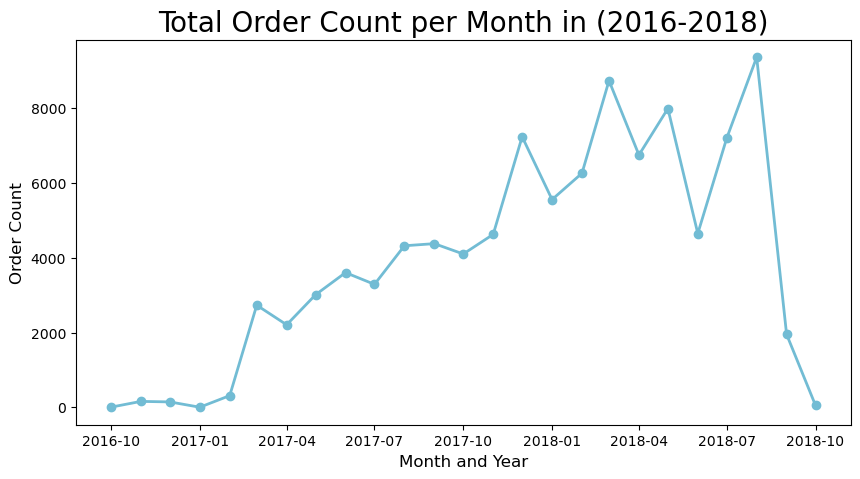

In [308]:
monthly_orders_df.index = pd.to_datetime(monthly_orders_df.index)

plt.figure(figsize=(10, 5))

plt.plot(
    monthly_orders_df.index,
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)

monthly_orders_df.index = pd.to_datetime(monthly_orders_df.index, format='%B %Y')

plt.title("Total Order Count per Month in (2016-2018)", loc="center", fontsize=20)
plt.xlabel("Month and Year", fontsize=12)
plt.ylabel("Order Count", fontsize=12)

plt.yticks(fontsize=10)

plt.show()

Berdasarkan data grafik diatas, dapat dilihat bahwa jumlah order tertinggi terjadi pada bulan Agustus 2018. Selain itu, kita juga dapat melihat adanya penurunan jumlah order yang cukup signifikan pada bulan Januari 2017, April 2017, Juli 2017, Oktober 2017, Januari 2018, April 2018, Juni 2018, dan Oktober 2018.

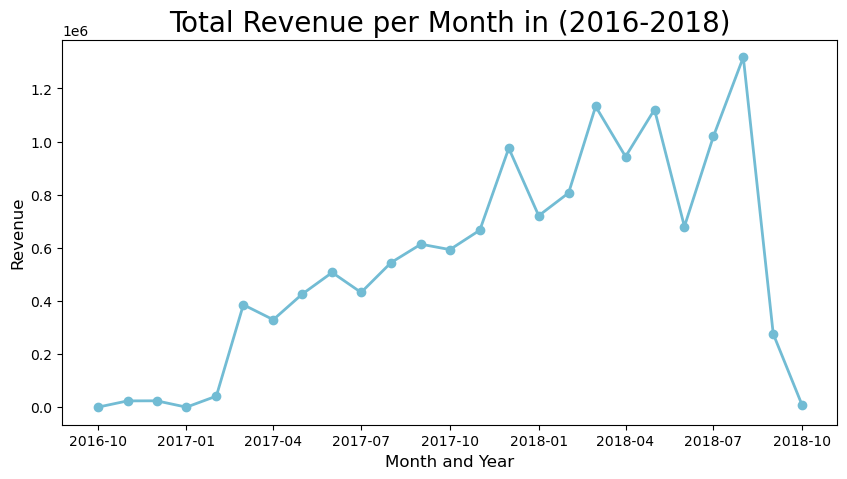

In [309]:
monthly_orders_df.index = pd.to_datetime(monthly_orders_df.index)

plt.figure(figsize=(10, 5))

plt.plot(
    monthly_orders_df.index,
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)

monthly_orders_df.index = pd.to_datetime(monthly_orders_df.index, format='%B %Y')

plt.title("Total Revenue per Month in (2016-2018)", loc="center", fontsize=20)
plt.xlabel("Month and Year", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

plt.yticks(fontsize=10)

plt.show()

Berdasarkan visualisasi di atas, penurunan jumlah orderan yang sangat signifikan terjadi pada bulan Januari 2017, April 2017, Juli 2017, Oktober 2017, Januari 2018, April 2018, Juni 2018, dan Oktober 2018 dapat berpengaruh terhadap penurunan Revenue Perusahaan.

### Produk apa yang paling banyak dan paling sedikit terjual?

In [310]:
byorder_df = all_df.groupby(by="product_category_name").order_id.nunique().reset_index()
byorder_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
byorder_df = byorder_df.sort_values(by="order_count", ascending=False)
byorder_df

,product_category_name,order_count
13,cama_mesa_banho,9417
11,beleza_saude,8836
32,esporte_lazer,7720
44,informatica_acessorios,6689
54,moveis_decoracao,6449
...,...,...
46,la_cuisine,13
17,cds_dvds_musicais,12
60,pc_gamer,8
37,fashion_roupa_infanto_juvenil,8


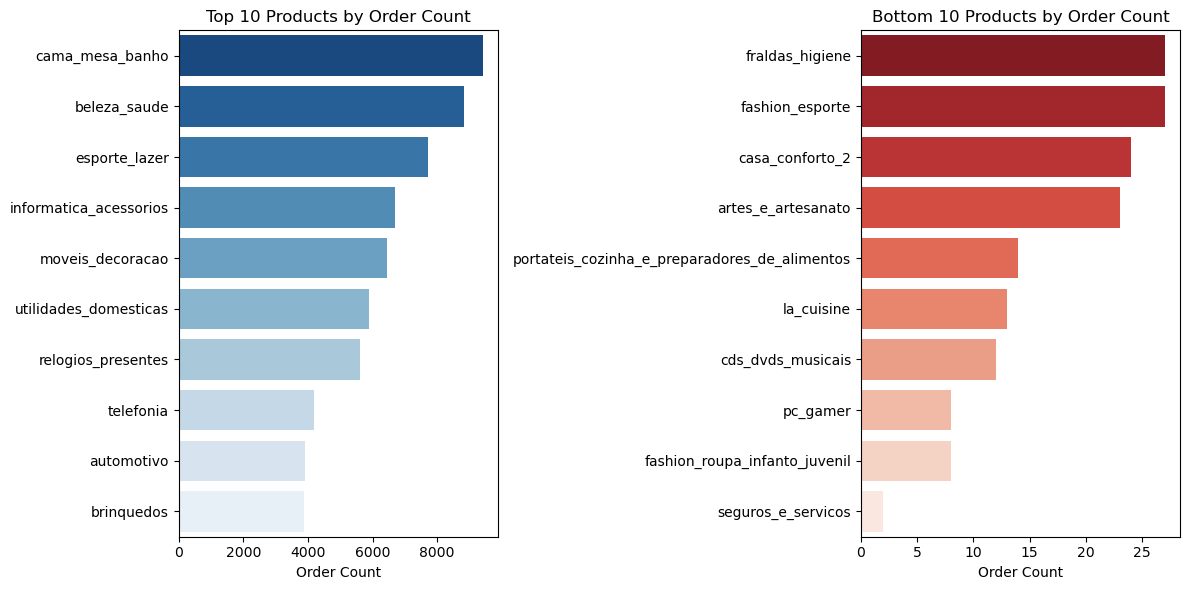

In [311]:
# Mengurutkan DataFrame berdasarkan jumlah order, menurun
byorder_df = byorder_df.sort_values(by="order_count", ascending=False)

# Mengambil 10 produk teratas
top_10_products = byorder_df.head(10)

# Mengambil 10 produk terbawah
bottom_10_products = byorder_df.tail(10)

# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Grafik pertama: Produk teratas
plt.subplot(1, 2, 1)
sn.barplot(
    x="order_count", 
    y="product_category_name",
    data=top_10_products,
    palette="Blues_r"  # Warna untuk produk teratas
)
plt.title("Top 10 Products by Order Count")
plt.xlabel("Order Count")
plt.ylabel(None)

# Grafik kedua: Produk terbawah
plt.subplot(1, 2, 2)
sn.barplot(
    x="order_count", 
    y="product_category_name",
    data=bottom_10_products,
    palette="Reds_r"  # Warna untuk produk terbawah
)
plt.title("Bottom 10 Products by Order Count")
plt.xlabel("Order Count")
plt.ylabel(None)

# Mengatur jarak antara kedua subplot
plt.tight_layout()

# Menampilkan grafik
plt.show()

Berdasarkan data grafik diatas, dapat dilihat bahwa produk cama_mesa_banho merupakan produk yang paling terlaris. dan sebaliknya produk seguros_e_servicos merupakan produk yang kurang terlaris.

### Bagaimana demografi pelanggan yang kita miliki?

In [312]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df = bystate_df.sort_values(by="customer_count", ascending=False)
bystate_df

,customer_state,customer_count
25,SP,41375
18,RJ,12762
10,MG,11544
22,RS,5432
17,PR,4998
23,SC,3612
4,BA,3358
6,DF,2125
7,ES,2025
8,GO,2007


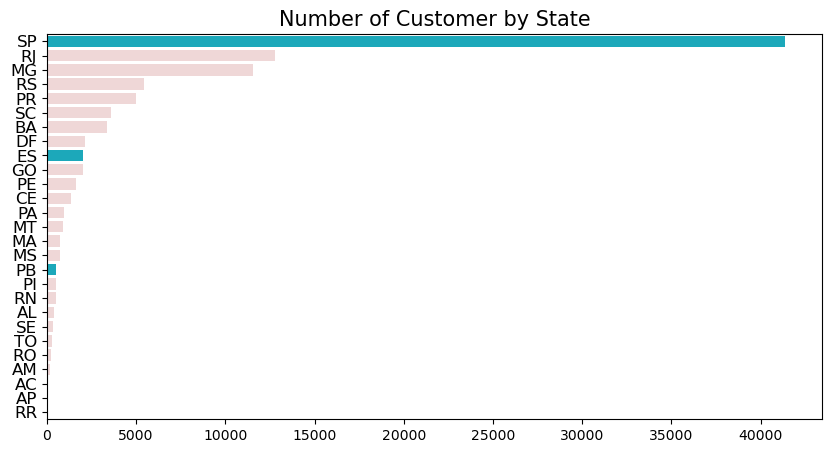

In [313]:
plt.figure(figsize=(10, 5))
colors_ = ["#02BCD4", "#F3D3D3", "#F3D3D3", "#F3D3D3", "#F3D3D3", "#F3D3D3", "#F3D3D3", "#F3D3D3"]
sn.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan data grafik diatas, dapat diketahui bahwa pelanggan perusahaan paling banyak berasal dari State SP dan pelanggan perusahaan paling sedikit berasal dari State RR.

### RFM Analysis

In [314]:
all_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
62416,8e8f8ef29c78c7b9c98cac70dd331ce2,1,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-15 08:50:25,170.0,30.44,telefonia,58.0,1500.0,...,delivered,2018-08-08 14:24:24,2018-08-09 08:50:25,2018-08-14 18:00:00,2018-08-21 15:32:26,2018-08-27,c8460e4251689ba205045f3ea17884a1,91170,porto alegre,RS
55956,7f40788714e03b8dda5b7ced37a77e37,1,544ffb995c65fbbe68f36f36e388dede,229c3efbfb0ea2058de4ccdfbc3d784a,2017-08-08 14:10:24,167.0,15.93,informatica_acessorios,60.0,290.0,...,delivered,2017-08-01 13:53:59,2017-08-01 14:10:24,2017-08-01 19:52:33,2017-08-04 17:23:53,2017-08-24,30e8026f44c4200b7d0186e73bb25d75,5639,sao paulo,SP
89807,cc02a7fcf32e60f96656ec24080b6d7b,1,42a2efd39155b59e16bac90081495285,b33e7c55446eabf8fe1a42d037ac7d6d,2018-02-02 14:31:24,215.0,16.26,relogios_presentes,35.0,1073.0,...,delivered,2018-01-29 14:13:06,2018-01-29 14:38:27,2018-01-30 22:04:13,2018-02-20 16:09:13,2018-03-02,1dcb5d5ef53c05ddf491665906f2f032,72930,alexania,GO
9666,162475e808583e34c8306484480badb8,1,1dec4c88c685d5a07bf01dcb0f8bf9f8,712e6ed8aa4aa1fa65dab41fed5737e4,2018-05-09 16:35:23,569.0,103.37,automotivo,44.0,982.0,...,delivered,2018-05-03 16:24:43,2018-05-03 16:35:23,2018-05-04 14:25:00,2018-05-15 18:50:39,2018-06-08,46b243ee048230f4654606f3728afbd5,37660,paraisopolis,MG
51539,753841f6cd9bed8cbb16bae45c571e8e,3,83caf799100f6f9418e0eb2950b757af,729f06993dac8e860d4f02d7088ca48a,2018-07-10 04:31:41,34.0,18.34,utilidades_domesticas,55.0,2334.0,...,delivered,2018-07-04 20:17:49,2018-07-05 16:09:37,2018-07-06 08:01:00,2018-07-10 18:32:56,2018-07-27,2967d88300cc430414a9e0b84bbd0147,25959,teresopolis,RJ


In [315]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "order_purchase_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,order_purchase_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [316]:
rfm_df["order_purchase_timestamp"] = rfm_df["order_purchase_timestamp"].dt.date
recent_date = orderdataset_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["order_purchase_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,order_purchase_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,198


In [317]:
rfm_df.drop("order_purchase_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


In [318]:
rfm_df.describe()

,frequency,monetary,recency
count,98666.0,98666.000000,98666.000000
mean,1.0,137.754076,289.716062
std,0.0,210.645145,153.392938
min,1.0,0.850000,44.000000
25%,1.0,45.900000,166.000000
50%,1.0,86.900000,271.000000
75%,1.0,149.900000,400.000000
max,1.0,13440.000000,773.000000


In [319]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
29063,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,44
76152,c4c66f47534e09a03fc7a878a9eda5ea,1,65.00,49
52937,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,49
88844,e60df9449653a95af4549bbfcb18a6eb,1,418.00,49
42327,6e353700bc7bcdf6ebc15d6de16d7002,1,45.90,49


In [320]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.8,337
65713,aa33d697a2f5ee04aae5e9a8227e913e,1,89.9,424
65783,aa5f8aa4c21fe89a04e8d221d4cd8ac1,1,26.0,58
65782,aa5f87b79875f43b90b310decb62356e,1,135.0,356
65781,aa5f5931b8901ae1ca4b8302f9b94c02,1,79.0,376


In [321]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8475,1617b1357756262bfa56ab541c47bc16,1,13440.0,383
91284,ec5b2ba62e574342386871631fafd3fc,1,7160.0,94
76948,c6e2731c5b391845f6800c97401a43a9,1,6735.0,612
94398,f48d464a0baaea338cb25f816991ab1f,1,6729.0,84
24603,3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.0,511


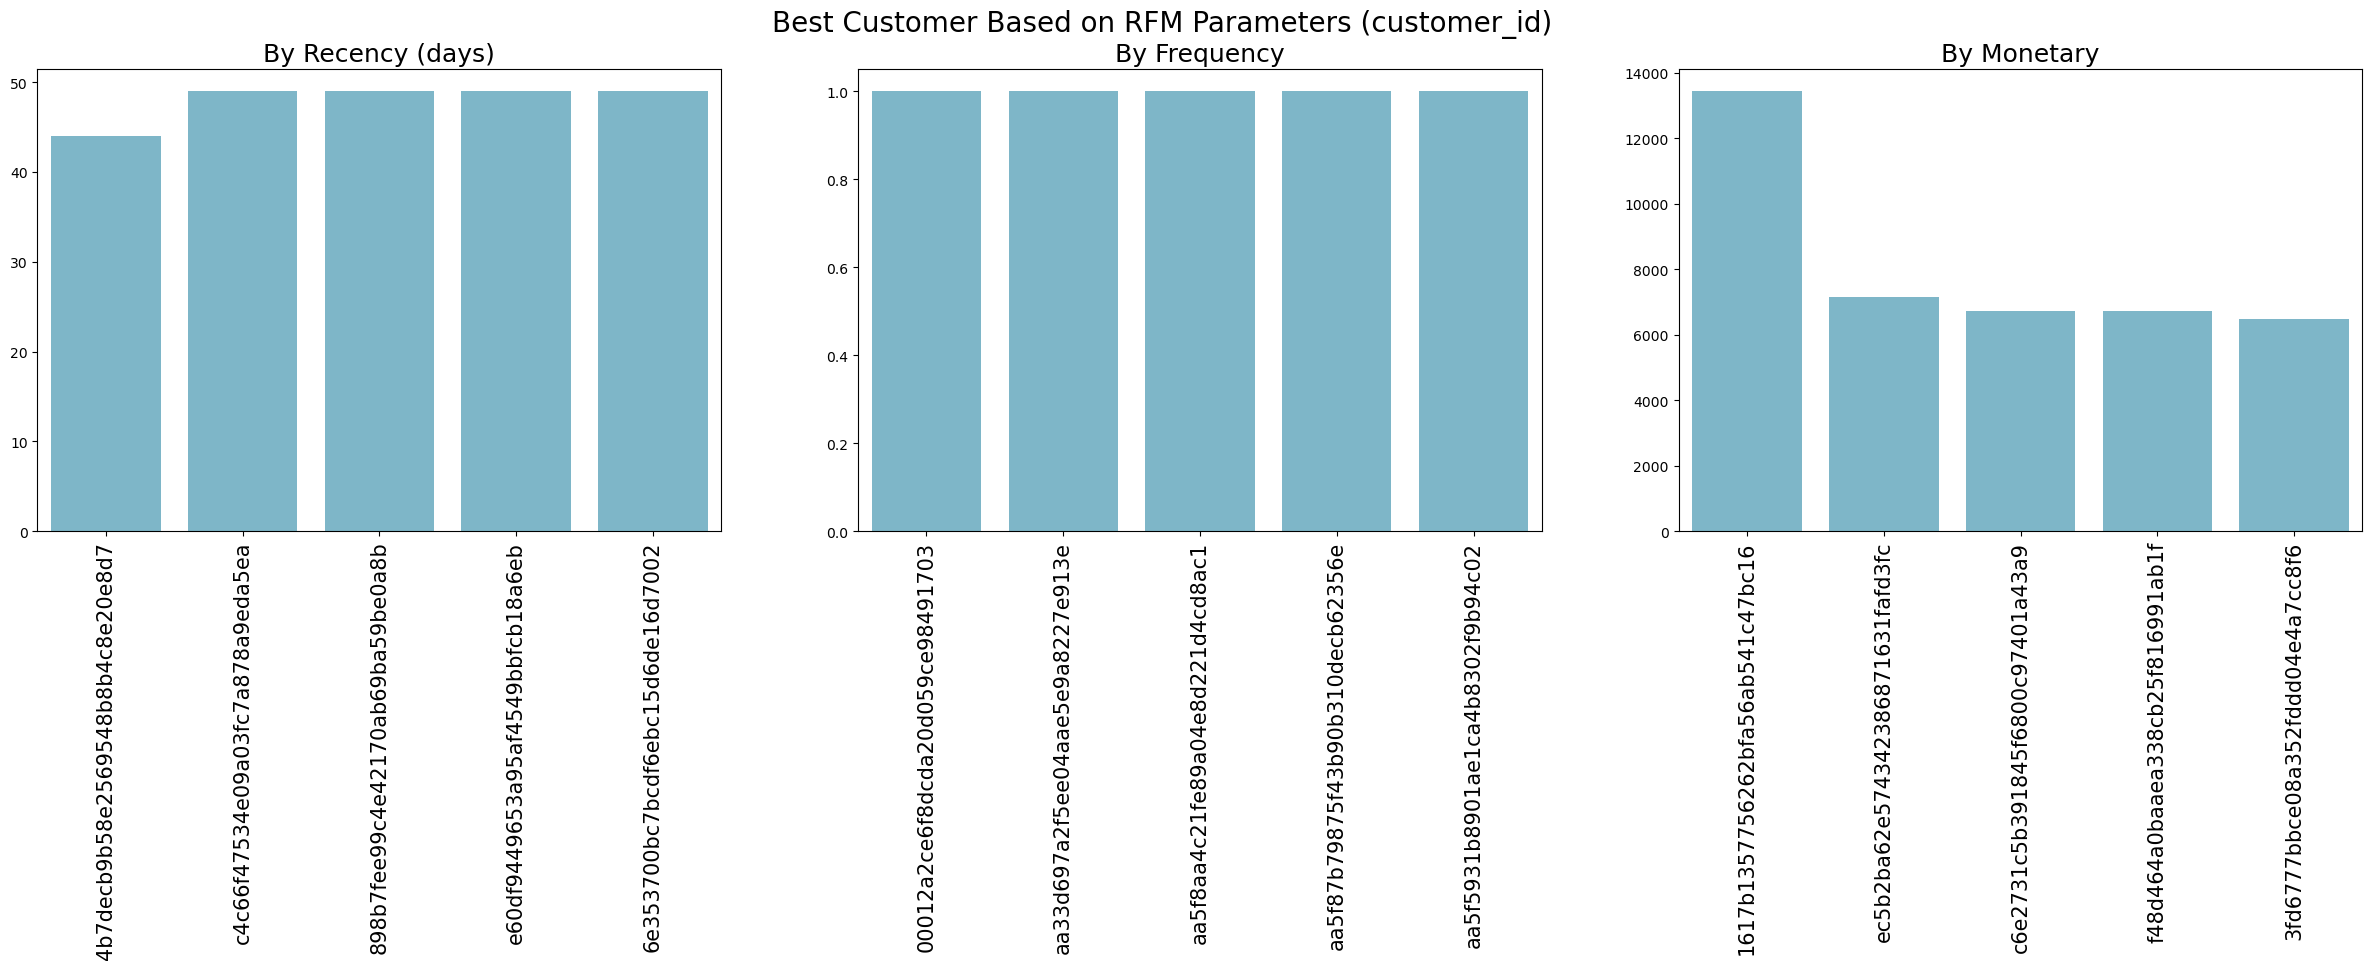

In [322]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sn.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

sn.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

sn.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Mengurutkan Pelanggan/Customer berdasarkan Recency, Frequency, & Monetary Score.

In [323]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,33933.0,49333.5,50486.5
1,000161a058600d5901f007fab4c27140,1,54.90,458,16637.5,49333.5,31312.5
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2807.0,49333.5,80169.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,20905.0,49333.5,73730.5
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,66341.0,49333.5,52932.0


In [324]:
# menormalkan peringkat pelanggan
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34.391786,100.0,51.169096
1,000161a058600d5901f007fab4c27140,1,54.90,458,16.862445,100.0,31.735856
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2.844952,100.0,81.253421
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21.187643,100.0,74.727363
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,67.237954,100.0,53.647660


In [325]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.12
1,000161a058600d5901f007fab4c27140,2.43
2,0001fd6190edaaf884bcaf3d49edf079,3.74
3,0002414f95344307404f0ace7a26f1d5,3.69
4,000379cdec625522490c315e70c7a9fb,3.43
5,0004164d20a9e969af783496f3408652,2.51
6,000419c5494106c306a97b5635748086,2.32


### Segmentasi Pelanggan berdasarkan RFM_score

In [326]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'Lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.12,Medium value customer
1,000161a058600d5901f007fab4c27140,2.43,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.74,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.69,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.43,Medium value customer
5,0004164d20a9e969af783496f3408652,2.51,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.62,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.81,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [327]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16030
1,Lost customers,1124
2,Low value customers,41487
3,Medium value customer,34491
4,Top customers,5534


In [328]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "Lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

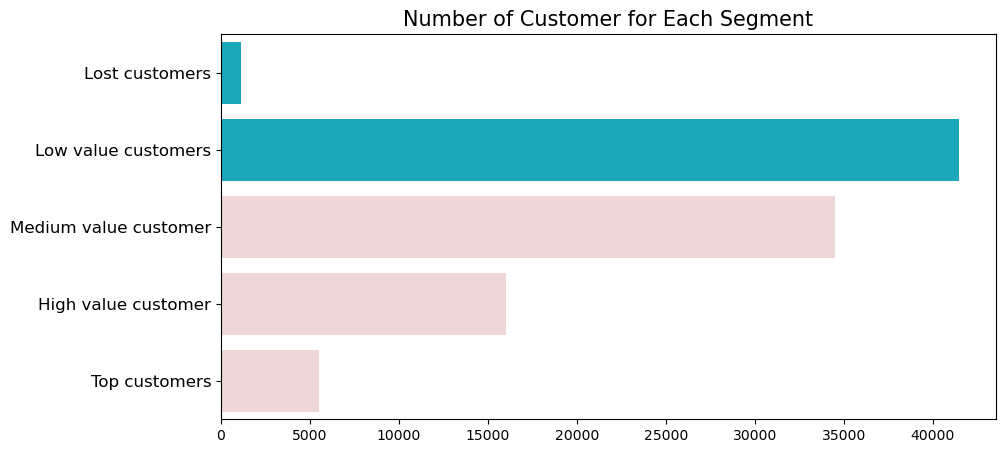

In [329]:
plt.figure(figsize=(10, 5))
colors_ = ["#02BCD4", "#02BCD4", "#F3D3D3", "#F3D3D3", "#F3D3D3"]

sn.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


Berdasarkan data grafik di atas, kita dapat melihat hasil dari RFM_score untuk setiap segmen pelanggan. Segmen pelanggan terbanyak pada segmen Low value customers dan segmen pelanggan paling sedikit adalah segmen Lost customers.

## Conclusion


- Bagaimana Performa & Revenue Pesanan Perusahaan dalam Beberapa Tahun Terakhir?
Performa dan Revenue pesanan produk perusahaan dari bulan Oktober 2016 - Juli 2018 Mengalami Kenaikan, dengan puncak tertinggi pesanan produk pada bulan Juli 2018.

- Produk apa yang paling banyak dan paling sedikit terjual?
Dapat dilihat bahwa produk cama_mesa_banho merupakan produk yang paling terlaris. dan sebaliknya produk seguros_e_servicos merupakan produk yang kurang terlaris.

- Bagaimana Demografi Pelanggan yang Perusahaan Memiliki?
Berdasarkan Pelanggan Negara Bagian (Customers State) tertinggi adalah State SP dengan total 41375 Customers dan Customers terendah adalah State RR dengan total 46 Customers.
Berdasarkan Produk Pesanan terlaris pelanggan adalah produk cama_mesa_banho = 9417 dan Produk Pesanan kurang terlaris pelanggan adalah produk seguros_e_servicos = 2.

- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
Dari RFM Analysis dapat dilihat uang yang dihabiskan pelanggan dalam beberapa bulan terakhir sejumlah 13440 BRL
